In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#convert func with choosing in list which values from tuple
def convert_tuples(arr, indices):
    num_tuple_vals = len(eval(arr[0][0][0]))
    output = []
    for row in arr:
        new_row = []
        for tuple_str in row:
            tuple_vals = eval(tuple_str[0])
            new_row.append([tuple_vals[i] for i in indices])
        output.append(new_row)
    return np.array(output).reshape((len(arr),len(arr[0]), len(indices)))

In [3]:
#prep data
def df_prep(df,val):
  label_encoder = LabelEncoder ()
  df["ADHD"]=label_encoder.fit_transform(df["ADHD"])
  y = df['ADHD']
  x = df.drop(['ADHD','gender'], axis = 1)
  x_train,  x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=111)
  x_train,y_train,x_test,y_test=np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)
  x_train,x_test=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)),np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  x_train,x_test=convert_tuples(x_train,val),convert_tuples(x_test,val)
  return x_train,y_train,x_test,y_test,label_encoder

In [4]:
def conf2(y_test,y_pred):
  confusion_mat = confusion_matrix(y_test, y_pred)


  TP = confusion_mat[1, 1]
  TN = confusion_mat[0, 0]
  FP = confusion_mat[0, 1]
  FN = confusion_mat[1, 0]

  return TP, TN, FP, FN

In [5]:
def df_prep_noSplit(df,val):
  label_encoder = LabelEncoder ()
  df["ADHD"]=label_encoder.fit_transform(df["ADHD"])
  y = df['ADHD']
  x = df.drop(['ADHD','gender'], axis = 1)
  x,y=np.array(x),np.array(y)
  x=np.reshape(x,(x.shape[0],x.shape[1],1))
  x=convert_tuples(x,val)
  return x,y,label_encoder

In [6]:
def conf(x_test,y_test,model):
  y_pred = model.predict(x_test,verbose=0)
  pred_class_y=[]
  for i in range(y_pred.shape[0]):
    pred_class_y.append(np.argmax(y_pred[:][i]))
  pred_class_y=np.array(pred_class_y)
  pred_class_y=label_encoder.inverse_transform(pred_class_y)
  y_test=label_encoder.inverse_transform(y_test)
  target=["Positive","Negative"]

  plt.figure(figsize=(10,5
                      ))
  fx=sns.heatmap(confusion_matrix(y_test,pred_class_y), annot=True, fmt=".2f",cmap="GnBu")
  fx.set_title('Confusion Matrix \n');
  fx.set_xlabel('\n Actual Values \n')
  fx.set_ylabel('Predicted Values \n');
  fx.xaxis.set_ticklabels(target)
  fx.yaxis.set_ticklabels(target)
  plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten ,LSTM,RepeatVector,TimeDistributed,Bidirectional,Input,Concatenate,GRU,Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Model
from keras.optimizers import Adam
#from keras.layers import  Conv2D, MaxPooling2D
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.backend import clear_session

#(('tanh', 'relu', or 'elu','sigmoid'))

In [8]:
folder_path="/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs"

In [9]:
files = os.listdir(folder_path)
filepaths=[]
for i in range(len(files)):
  filepath = os.path.join(folder_path, files[i])
  filepaths.append(filepath)
filepaths

['/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_2.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_1.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_3.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_4.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_5.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_6.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_7.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_8.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_9.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_10.csv',
 '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/tests_CSVs/test_11.csv']

In [10]:
files = os.listdir(folder_path)
dfs_dic = {}
for filename in files:
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        # Construct the full path to the file
        file_path = os.path.join(folder_path, filename)

        # Load the CSV file into a Pandas DataFrame
        df = pd.read_csv(file_path)
        df = df.iloc[:, 1:]

        # Store the DataFrame in the dictionary with the filename as the key
        dfs_dic[filename] = df

In [11]:
#df of each test
df_1=dfs_dic[ 'test_1.csv']
df_2=dfs_dic[ 'test_2.csv']
df_3=dfs_dic[ 'test_3.csv']
df_4=dfs_dic[ 'test_4.csv']
df_5=dfs_dic[ 'test_5.csv']
df_6=dfs_dic[ 'test_6.csv']
df_7=dfs_dic[ 'test_7.csv']
df_8=dfs_dic[ 'test_8.csv']
df_9=dfs_dic[ 'test_9.csv']
df_10=dfs_dic[ 'test_10.csv']
df_11=dfs_dic[ 'test_11.csv']

In [12]:
dfs=[]
dfs.append(df_1)
dfs.append(df_2)
dfs.append(df_3)
dfs.append(df_4)
dfs.append(df_5)
dfs.append(df_6)
dfs.append(df_7)
dfs.append(df_8)
dfs.append(df_9)
dfs.append(df_10)
dfs.append(df_11)

In [13]:
df=dfs[3]
x_train,y_train,label_encoder=df_prep_noSplit(df,[0,1])
x_train.shape,y_train.shape

((79, 11520, 2), (79,))

In [14]:

df_t = pd.concat([dfs[-2], dfs[-1]])
df_t=df_t.reset_index(drop=True)
x,y,label_encoder2=df_prep_noSplit(df_t,[0,1])
x.shape,y.shape

((158, 11520, 2), (158,))

In [16]:
ne=50
lr=0.00001
d=0.4
f=64
k=21
def modeling(x_train,y_train,mod):
  clear_session()
  if mod == 'BI_LSTM':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne,activation='tanh', return_sequences=True), input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(tf.keras.layers.Dropout(d))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne,return_sequences=True)))
    model.add(tf.keras.layers.Dropout(d))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(ne,return_sequences=True)))
   # model.add(tf.keras.layers.Dropout(0.2))
    model.add(Flatten())
    #make gradiant between [-0,5,0.5]insted of [-1,1]
    #model.compile(optimizer=Adam(0.00001,clipvalue=0.5),loss='sparse_categorical_crossentropy',metrics='accuracy')
  elif mod == 'LSTM':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(ne,activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(tf.keras.layers.Dropout(d))
    model.add(tf.keras.layers.LSTM(ne,return_sequences=True))
    model.add(tf.keras.layers.Dropout(d))
    #model.add(tf.keras.layers.LSTM(ne,return_sequences=True))
    #model.add(tf.keras.layers.Dropout(0.2))
    #model.add(tf.keras.layers.LSTM(ne,return_sequences=True))

    model.add(Flatten())
  elif mod == 'GRU':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(ne, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), reset_after=True, recurrent_activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(d))
    model.add(tf.keras.layers.GRU(ne, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(d))
    #model.add(tf.keras.layers.GRU(ne, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
  elif mod == 'CNN':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters = f,kernel_size=k , activation="tanh" ,input_shape =(x_train.shape[1],x_train.shape[2])))
    model.add(tf.keras.layers.Conv1D(filters=f, kernel_size=k, activation="tanh"))
    model.add(tf.keras.layers.Dropout(d))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=5))
    model.add(tf.keras.layers.Conv1D(filters=f, kernel_size=k, activation="tanh"))
    model.add(tf.keras.layers.Dropout(d))
    model.add(tf.keras.layers.MaxPooling1D(pool_size=5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 128,activation="tanh"))
    #model.add(Dense(1,activation='sigmoid'))#11
#for CNN batch_size=5,epochs=20
  model.add(tf.keras.layers.Dense(units=2,activation='softmax'))
  model.compile(optimizer=Adam(lr),loss='sparse_categorical_crossentropy',metrics=['accuracy'])#binary_crossentropy
  h= model.fit(
    x_train,
    y_train,
    validation_split = 0.1,
    batch_size = 5,
    epochs = 20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 5,restore_best_weights = True)],verbose=1)
  return model,h

# BI-lstm

In [17]:
import time
s_time=time.time()
model1,h1=modeling(x_train,y_train,'BI_LSTM')
e_time=time.time()

Epoch 1/20
15/15 [==============================] - 30s 1s/step - loss: 0.6973 - accuracy: 0.5634 - val_loss: 0.5351 - val_accuracy: 0.8750
Epoch 2/20
15/15 [==============================] - 18s 1s/step - loss: 0.2776 - accuracy: 0.9296 - val_loss: 1.1129 - val_accuracy: 0.2500
Epoch 3/20
15/15 [==============================] - 15s 963ms/step - loss: 0.1400 - accuracy: 0.9859 - val_loss: 0.7158 - val_accuracy: 0.8750
Epoch 4/20
15/15 [==============================] - 15s 954ms/step - loss: 0.0801 - accuracy: 1.0000 - val_loss: 0.9825 - val_accuracy: 0.5000
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.0462 - accuracy: 1.0000 - val_loss: 0.9650 - val_accuracy: 0.7500
Epoch 6/20
15/15 [==============================] - 15s 972ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 0.8517 - val_accuracy: 0.7500


In [18]:
time=(e_time - s_time)/60
time

1.887052055199941

In [19]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
TP, TN, FP, FN=[],[],[],[]
y_pred1=model1.predict(x,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
TP_, TN_, FP_, FN_ = conf2(y, y_pred)
TP.append(TP_)
TN.append(TN_)
FP.append(FP_)
FN.append(FN_)
acc.append(accuracy_score(y, y_pred) )
precision.append (precision_score(y, y_pred))
recall.append(recall_score(y, y_pred))
f1.append(f1_score(y, y_pred))
auroc.append(roc_auc_score(y, y_pred))



# LSTM

In [20]:
import time
s_time=time.time()
model2,h2=modeling(x_train,y_train,'LSTM')
e_time=time.time()

Epoch 1/20
15/15 [==============================] - 12s 601ms/step - loss: 0.7253 - accuracy: 0.4930 - val_loss: 1.0574 - val_accuracy: 0.0000e+00
Epoch 2/20
15/15 [==============================] - 7s 455ms/step - loss: 0.4681 - accuracy: 0.8169 - val_loss: 0.7128 - val_accuracy: 0.5000
Epoch 3/20
15/15 [==============================] - 8s 554ms/step - loss: 0.3324 - accuracy: 0.9859 - val_loss: 0.6875 - val_accuracy: 0.6250
Epoch 4/20
15/15 [==============================] - 7s 469ms/step - loss: 0.2402 - accuracy: 1.0000 - val_loss: 0.6915 - val_accuracy: 0.6250
Epoch 5/20
15/15 [==============================] - 8s 576ms/step - loss: 0.1866 - accuracy: 1.0000 - val_loss: 0.7206 - val_accuracy: 0.5000
Epoch 6/20
15/15 [==============================] - 7s 455ms/step - loss: 0.1520 - accuracy: 1.0000 - val_loss: 0.6466 - val_accuracy: 0.6250
Epoch 7/20
15/15 [==============================] - 8s 551ms/step - loss: 0.1200 - accuracy: 1.0000 - val_loss: 0.6711 - val_accuracy: 0.6250
E

In [21]:
time=(e_time - s_time)/60
time

1.9946383237838745

In [22]:
y_pred2=model2.predict(x,verbose=0)
y_pred=[]
for i in range(y_pred2.shape[0]):
    y_pred.append(np.argmax(y_pred2[:][i]))
y_pred=np.array(y_pred)
TP_, TN_, FP_, FN_ = conf2(y, y_pred)
TP.append(TP_)
TN.append(TN_)
FP.append(FP_)
FN.append(FN_)
acc.append(accuracy_score(y, y_pred) )
precision.append (precision_score(y, y_pred))
recall.append(recall_score(y, y_pred))
f1.append(f1_score(y, y_pred))
auroc.append(roc_auc_score(y, y_pred))




# GRU

In [23]:
import time
s_time=time.time()
model3,h3=modeling(x_train,y_train,'GRU')
e_time=time.time()

Epoch 1/20
15/15 [==============================] - 12s 515ms/step - loss: 0.8283 - accuracy: 0.4648 - val_loss: 0.6275 - val_accuracy: 0.6250
Epoch 2/20
15/15 [==============================] - 8s 560ms/step - loss: 0.4355 - accuracy: 0.8451 - val_loss: 0.6281 - val_accuracy: 0.6250
Epoch 3/20
15/15 [==============================] - 7s 467ms/step - loss: 0.2011 - accuracy: 0.9859 - val_loss: 0.6063 - val_accuracy: 0.6250
Epoch 4/20
15/15 [==============================] - 8s 568ms/step - loss: 0.1557 - accuracy: 0.9859 - val_loss: 0.5468 - val_accuracy: 0.7500
Epoch 5/20
15/15 [==============================] - 7s 466ms/step - loss: 0.1130 - accuracy: 1.0000 - val_loss: 0.6124 - val_accuracy: 0.6250
Epoch 6/20
15/15 [==============================] - 8s 544ms/step - loss: 0.0928 - accuracy: 1.0000 - val_loss: 0.6420 - val_accuracy: 0.6250
Epoch 7/20
15/15 [==============================] - 7s 471ms/step - loss: 0.0696 - accuracy: 1.0000 - val_loss: 0.6172 - val_accuracy: 0.7500
Epoch

In [24]:
time=(e_time - s_time)/60
time

1.8532705942789713

In [25]:
y_pred3=model3.predict(x,verbose=0)
y_pred=[]
for i in range(y_pred3.shape[0]):
    y_pred.append(np.argmax(y_pred3[:][i]))
y_pred=np.array(y_pred)
TP_, TN_, FP_, FN_ = conf2(y, y_pred)
TP.append(TP_)
TN.append(TN_)
FP.append(FP_)
FN.append(FN_)
acc.append(accuracy_score(y, y_pred) )
precision.append (precision_score(y, y_pred))
recall.append(recall_score(y, y_pred))
f1.append(f1_score(y, y_pred))
auroc.append(roc_auc_score(y, y_pred))

# df_results

In [26]:
models=['BI-LSTM','LSTM','GRU']
results=pd.DataFrame({'Models':models,'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc,'TP':TP, 'TN':TN, 'FP':FP, 'FN':FN })
results

,Models,Accuracy,Precision,Recall,F1,AURoc,TP,TN,FP,FN
0,BI-LSTM,0.708861,0.750000,0.567568,0.646154,0.700450,42,70,14,32
1,LSTM,0.822785,0.761364,0.905405,0.827160,0.827703,67,63,21,7
2,GRU,0.740506,0.708861,0.756757,0.732026,0.741474,56,61,23,18


In [27]:
results.to_csv("/content/drive/MyDrive/TrainING/NoteBOOks/results_base.csv")

# Training

In [ ]:
df_4

,2023-07-31 00:00:00,2023-07-31 00:00:00.003906250,2023-07-31 00:00:00.007812500,2023-07-31 00:00:00.011718750,2023-07-31 00:00:00.015625,2023-07-31 00:00:00.019531250,2023-07-31 00:00:00.023437500,2023-07-31 00:00:00.027343750,2023-07-31 00:00:00.031250,2023-07-31 00:00:00.035156250,...,2023-07-31 00:00:44.968750,2023-07-31 00:00:44.972656250,2023-07-31 00:00:44.976562500,2023-07-31 00:00:44.980468750,2023-07-31 00:00:44.984375,2023-07-31 00:00:44.988281250,2023-07-31 00:00:44.992187500,2023-07-31 00:00:44.996093750,gender,ADHD
0,"(3.104, -35.127)","(-1.689, -42.846)","(-5.761, -44.689)","(-3.516, -39.443)","(-3.401, -31.743)","(-8.715, -28.454)","(-11.486, -27.655)","(-7.908, -23.859)","(-5.303, -20.895)","(-8.158, -23.791)",...,"(-17.349, 19.484)","(-9.495, 18.096)","(-3.573, 10.62)","(-6.581, 3.24)","(-14.348, -1.191)","(-15.855, -3.504)","(-10.726, -4.72)","(-3.648, -4.614)",Male,Positive
1,"(-7.869, 1.239)","(-4.009, 0.048)","(-1.776, -3.237)","(1.828, -3.71)","(10.094, 2.015)","(22.328, 12.505)","(35.588, 21.749)","(46.579, 25.739)","(54.992, 27.115)","(63.911, 30.921)",...,"(38.201, 23.951)","(34.224, 19.807)","(29.405, 16.806)","(29.757, 19.55)","(35.318, 27.51)","(42.302, 36.468)","(48.049, 40.888)","(47.621, 36.097)",Male,Positive
2,"(2.49, 10.599)","(11.195, 10.435)","(8.265, 11.164)","(1.244, 12.417)","(-3.91, 12.1)","(3.268, 10.015)","(13.361, 5.87)","(8.144, 1.375)","(-1.41, -1.77)","(-4.927, -4.34)",...,"(4.833, 1.363)","(0.661, 0.966)","(-15.204, 2.78)","(-24.772, 6.461)","(-14.427, 9.325)","(2.964, 9.19)","(3.831, 6.577)","(-12.884, 4.415)",Male,Positive
3,"(-19.285, -10.856)","(-21.429, -9.999)","(-22.911, -6.748)","(-22.212, -3.212)","(-22.738, -5.382)","(-23.476, -9.118)","(-23.054, -12.245)","(-23.745, -14.056)","(-20.22, -12.38)","(-16.586, -9.976)",...,"(-13.818, -32.419)","(-16.886, -35.165)","(-20.041, -33.515)","(-21.731, -29.103)","(-24.041, -24.689)","(-24.893, -22.8)","(-26.91, -24.387)","(-28.252, -26.214)",Male,Positive
4,"(1.705, 5.455)","(1.823, 9.902)","(-1.023, 5.108)","(-5.27, -0.565)","(-7.341, -0.397)","(-8.259, 2.557)","(-6.988, 6.857)","(-6.099, 5.784)","(-7.646, -0.784)","(-8.653, -9.142)",...,"(7.104, -14.009)","(1.584, -6.374)","(3.181, -1.631)","(8.427, -2.476)","(9.816, -4.404)","(3.949, -6.162)","(-6.848, -6.126)","(-9.501, -5.21)",Male,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,"(9.069, 38.774)","(6.395, 40.744)","(3.388, 42.824)","(3.603, 44.365)","(5.117, 40.445)","(4.93, 37.111)","(3.594, 34.791)","(2.939, 32.033)","(1.504, 30.294)","(-0.595, 26.72)",...,"(3.107, 27.312)","(-3.421, 22.172)","(-7.286, 20.879)","(-6.388, 23.746)","(-2.927, 25.434)","(-0.129, 24.599)","(-0.16, 22.282)","(-2.034, 23.396)",Female,Negative
75,"(-3.107, -1.76)","(0.301, 1.934)","(0.878, 0.934)","(0.155, -1.279)","(0.854, -0.939)","(3.176, 1.692)","(6.597, 5.491)","(10.985, 8.773)","(11.746, 9.233)","(7.649, 7.785)",...,"(-1.009, -2.849)","(-1.169, -4.447)","(0.326, -5.264)","(1.088, -7.169)","(-3.841, -11.024)","(-11.473, -12.999)","(-12.237, -10.299)","(-6.179, -6.303)",Female,Negative
76,"(-17.85, -19.421)","(-7.218, -9.338)","(9.343, -3.146)","(18.577, -4.661)","(16.424, -11.578)","(6.607, -17.081)","(-4.913, -16.598)","(-10.147, -11.433)","(-5.498, -5.624)","(2.506, -1.453)",...,"(-6.348, 2.432)","(-2.143, 2.123)","(2.986, 0.231)","(5.4, 0.58)","(3.216, 0.747)","(-0.78, -0.44)","(-2.571, 0.745)","(-0.925, 3.436)",Female,Negative
77,"(4.426, -1.931)","(0.408, -7.7)","(-3.14, -10.916)","(-5.496, -11.902)","(-8.613, -12.039)","(-12.551, -10.793)","(-13.709, -6.14)","(-9.997, 0.618)","(-4.928, 4.588)","(-1.976, 5.442)",...,"(8.102, -2.53)","(10.214, 0.865)","(11.869, 3.615)","(11.645, 6.046)","(9.204, 7.01)","(4.562, 3.444)","(-1.134, -3.59)","(-4.774, -9.817)",Female,Negative


In [ ]:
x_train,y_train,x_test,y_test,label_encoder=df_prep(df,[0,1])
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((63, 11520, 2), (63,), (16, 11520, 2), (16,))

In [ ]:
def modeling(x_train,y_train,x_test,y_test,mod):
  if mod == 'BI_LSTM':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,activation='tanh', return_sequences=True), input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
    model.add(tf.keras.layers.Dropout(0.4))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50,return_sequences=True)))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(Flatten())
    model.add (tf.keras.layers.Dense(units=2,activation='softmax'))
    #make gradiant between [-0,5,0.5]insted of [-1,1]
    #model.compile(optimizer=Adam(0.00001,clipvalue=0.5),loss='sparse_categorical_crossentropy',metrics='accuracy')
    model.compile(optimizer=Adam(0.00001),loss='sparse_categorical_crossentropy',metrics='accuracy')
  elif mod == 'LSTM':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(64,activation='tanh', return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.7))
    #model.add(tf.keras.layers.LSTM(50,return_sequences=True))
    #model.add(tf.keras.layers.Dropout(0.2))
    #model.add(tf.keras.layers.LSTM(50,return_sequences=True))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(Flatten())
    model.add (tf.keras.layers.Dense(units=2,activation='softmax'))
    model.compile(optimizer=Adam(0.00001),loss='sparse_categorical_crossentropy',metrics='accuracy')
  elif mod == 'GRu':
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(64, activation='tanh', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]), reset_after=True, recurrent_activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.7))
    #model.add(tf.keras.layers.GRU(50, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))
    #model.add(tf.keras.layers.Dropout(0.2))
    #model.add(tf.keras.layers.GRU(50, return_sequences=True, reset_after=True, recurrent_activation='sigmoid'))
    #model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  h= model.fit(
    x_train,
    y_train,
    validation_split = 0.1,
    batch_size = 5,
    epochs = 25,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 7,restore_best_weights = True)],verbose=1)
  return model,h

In [ ]:
model,h=modeling(x_train,y_train,x_test,y_test,'BI_LSTM')

Epoch 1/25
12/12 [==============================] - 747s 61s/step - loss: 0.8312 - accuracy: 0.4643 - val_loss: 0.7566 - val_accuracy: 0.4286
Epoch 2/25
12/12 [==============================] - 744s 62s/step - loss: 0.4334 - accuracy: 0.7500 - val_loss: 0.6136 - val_accuracy: 0.7143
Epoch 3/25
12/12 [==============================] - 751s 62s/step - loss: 0.2417 - accuracy: 0.8571 - val_loss: 0.6688 - val_accuracy: 0.5714
Epoch 4/25
12/12 [==============================] - 755s 63s/step - loss: 0.0815 - accuracy: 1.0000 - val_loss: 0.6169 - val_accuracy: 0.8571
Epoch 5/25
12/12 [==============================] - 756s 63s/step - loss: 0.0606 - accuracy: 1.0000 - val_loss: 0.5712 - val_accuracy: 0.7143
Epoch 6/25
12/12 [==============================] - 752s 63s/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 0.5950 - val_accuracy: 0.7143
Epoch 7/25
12/12 [==============================] - 739s 62s/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.5888 - val_accuracy: 0.7143
Epoch 

In [ ]:
###4.8 hours train not recommended to run same arch

In [ ]:
model_acc = model.evaluate(x_test, y_test, verbose=0)[1]
print(f"Test Accuracy : {round(model_acc, 3)*100} %")

Test Accuracy : 81.2 %


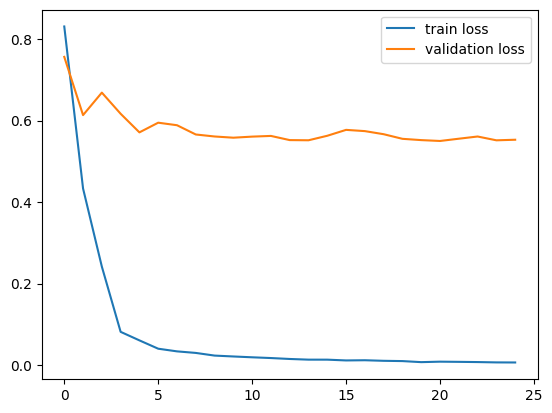

In [ ]:
plt.plot(h.history['loss'],label="train loss")
plt.plot(h.history['val_loss'],label='validation loss')
#plt.plot(h.history['accuracy'],label='accuracy ')
plt.legend()

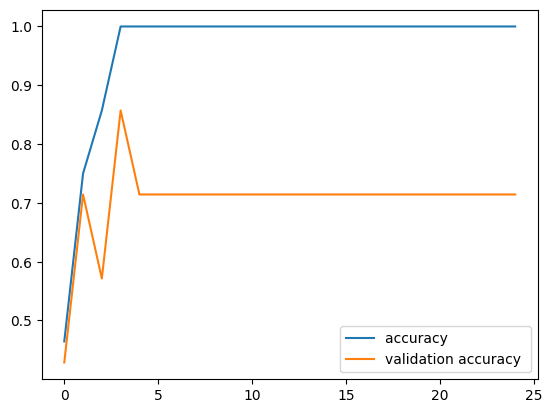

In [ ]:
plt.plot(h.history['accuracy'],label='accuracy ')
plt.plot(h.history['val_accuracy'],label='validation accuracy ')
plt.legend()

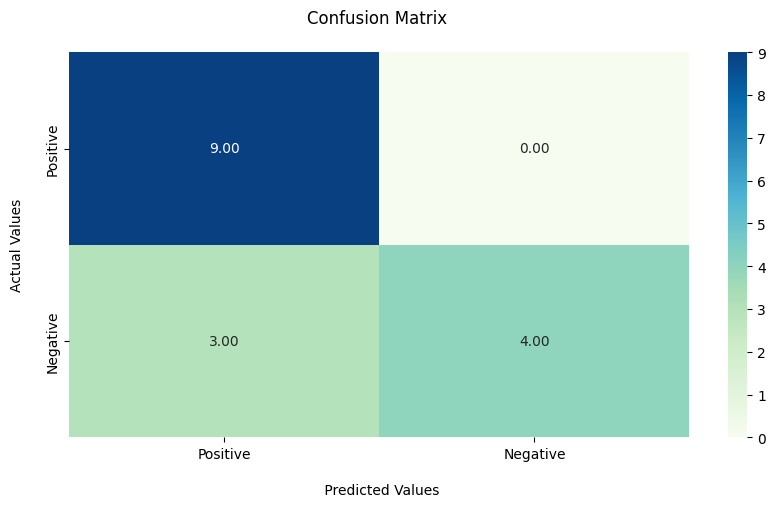

In [ ]:
conf(x_test,y_test,model)

# Saving model

In [ ]:
m_path="/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/models"
model_path = os.path.join(m_path, 'BI_lstm(81%).h5')

In [ ]:
model.save(model_path)

In [ ]:
"""
test give better results than baseline and neutral
only tests{4,5,6}
rest are diff channels for baseline and neutral stats
cell 4: Cognitive Challenge, channels: Cz, F4, duration: 45s
cell 5: Pre-Omni harmonic baseline, channels: Cz, F4, duration: 15s
cell 6: Omni harmonic assessment, channels: Cz, F4, duration: 30s
"""

'\ntest give better results than baseline and neutral\nonly tests{4,5,6}\nrest are diff channels for baseline and neutral stats\ncell 4: Cognitive Challenge, channels: Cz, F4, duration: 45s\ncell 5: Pre-Omni harmonic baseline, channels: Cz, F4, duration: 15s\ncell 6: Omni harmonic assessment, channels: Cz, F4, duration: 30s\n'

# load save model and Test on diff df

In [ ]:
#test df 10 &  11 test bcs have the same length as df 4 (df that model trained on it)
df = pd.concat([dfs[-2], dfs[-1]])
df=df.reset_index(drop=True)
df.shape


(158, 11522)

In [ ]:
x,y,label_encoder=df_prep_noSplit(df,[0,1])
x.shape,y.shape

((158, 11520, 2), (158,))

In [ ]:
#load model and try in diff test

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/TrainING/Group 1 (ADHD)/Dataset 3/models/BI_lstm(81%).h5'
model = load_model(model_path)

In [ ]:
test_acc = model.evaluate(x, y, verbose=0)[1]

print(f"test Accuracy : {round(test_acc, 3)*100} %")

test Accuracy : 72.2 %


In [ ]:
acc=[]
precision=[]
recall=[]
f1=[]
auroc=[]
y_pred1=model.predict(x,verbose=0)
y_pred=[]
for i in range(y_pred1.shape[0]):
    y_pred.append(np.argmax(y_pred1[:][i]))
y_pred=np.array(y_pred)
acc.append(accuracy_score(y, y_pred) )
precision.append (precision_score(y, y_pred))
recall.append(recall_score(y, y_pred))
f1.append(f1_score(y, y_pred))
auroc.append(roc_auc_score(y, y_pred))

In [ ]:
results=pd.DataFrame({'Accuracy':acc, 'Precision':precision,'Recall':recall,'F1':f1,'AURoc':auroc})
results

,Accuracy,Precision,Recall,F1,AURoc
0,0.721519,0.840909,0.5,0.627119,0.708333


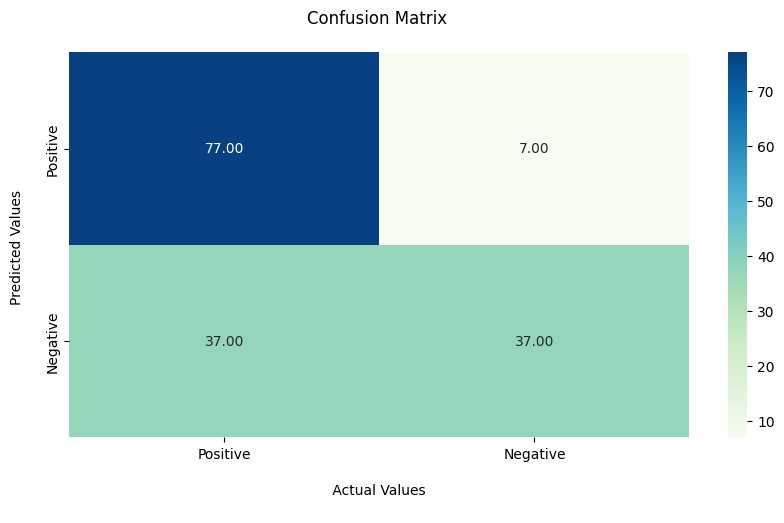

In [ ]:
conf(x,y,model)

In [ ]:
"""
saved model give good acc too in diff datasets

"""